findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED

成功访问


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

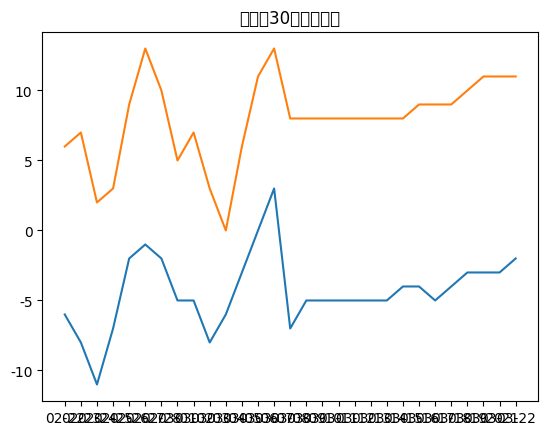

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.tianqi.com/shenyang/30/'

def getHTMLtext(url):   
  """请求获得网页内容"""
  headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36"}
  try:        
   r = requests.get(url, timeout = 30, headers = headers)    
   r.raise_for_status()        
   r.encoding = r.apparent_encoding     
   print("成功访问")        
   return r.text    
  except:        
   print("访问错误")       
   return" "


def get_content(html):
  """处理得到有用信息保存数据文件"""
  final = []
  bs = BeautifulSoup(html, "html.parser")
  body = bs.body
  ul = body.find('ul', {'class': 'weaul'})
  li = ul.find_all('li')
  i = 0
  for day in li:
    if i < 30 and i > 0:
      temp = []
      date = day.find(attrs={'class':'fl'}).string
      temp.append(date)   

      inf = day.find_all(attrs={'class':'weaul_z'})
      temp.append(inf[0].string)  
      tem = inf[1].find_all('span')   
      tem_low = tem[0].string
      tem_high = tem[1].string
      temp.append(tem_low) 
      temp.append(tem_high)   
      final.append(temp)
    i = i + 1
  return final

if __name__ == '__main__':
  html_text = getHTMLtext(url)
  data = get_content(html_text)

  header =[['日期','天气','最低温度','最高温度']]
  with open('weather.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(header)
    writer.writerows(data)

  df = pd.read_csv("weather.csv")
  
  x = df["日期"]
  y1 = df["最低温度"]
  y2 = df["最高温度"]
  
  # 中文乱码
  plt.rcParams['font.sans-serif']=['SimHei']
  plt.rcParams['axes.unicode_minus']=False
  # 绘制折线图
  plt.plot(x, y1)
  plt.plot(x, y2)
  
  plt.title("本市近30天温度情况")
  plt.show()